<a href="https://colab.research.google.com/github/sadikinisaac/countingwords/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [0]:
#Customizable Parameters

In [0]:
# Number of nodes in the network
num_nodes = 1000
# Correct order of transactions. You can change the number of transactions also by adding/removing elements from the list.
order = [0.1, 0.21, 0.27, 0.34, 0.5, 0.55, 0.59, 0.76, 0.82, 0.9]
# Standard deviation of Gaussian noise
noise = 0.3
# Colors for scatter plot
colors = cm.rainbow(np.linspace(0, 1, len(order)))
# Sampling ratio s
s = 0.03 
# Aggregation method, e.g. np.median, np.mean, np.min, np.max, etc
aggregator = np.median

In [0]:
#Data Generation

In [3]:
# Creates table LEDGER and generates Gaussian noise based on the correct order list above
# Each column is a different node, while each row is a different transaction value
ledger = pd.DataFrame(index = order, data = order)
for i in range(num_nodes): # Populates table by column
    ledger[i] = [value + np.random.normal(0, noise) for value in order]
ledger

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0.10,0.637114,-0.160397,0.081794,-0.297880,0.224163,0.036345,-0.193638,-0.058000,0.208721,-0.453877,0.106769,-0.366535,-0.050033,-0.423387,-0.056829,0.580584,0.836692,0.113211,0.125149,0.458556,0.038597,0.775167,0.311437,-0.303951,0.226961,-0.278576,0.166995,0.418413,0.203351,0.234133,0.277426,0.144984,0.354360,0.069001,0.280980,-0.622732,0.401980,0.150937,0.556068,0.213365,...,-0.043064,0.265312,0.359080,-0.074850,0.072151,-0.150145,0.267532,-0.654219,0.568559,0.088385,0.828013,0.339629,0.163351,0.060771,0.386647,0.104529,0.297095,0.149559,-0.095441,0.273395,0.020108,0.336858,-0.194138,-0.031674,0.397353,1.000809,0.020395,-0.008250,-0.078346,0.318142,0.012871,0.448070,-0.199734,0.567920,-0.077045,0.061583,0.389230,-0.228160,-0.125524,-0.050971
0.21,0.231226,0.441375,-0.486158,0.013525,0.414181,0.472723,0.434842,-0.239343,0.206984,0.334788,0.099283,-0.031706,0.379319,0.373101,0.079207,0.226601,0.455743,0.281096,0.619941,0.203459,-0.164007,0.240467,-0.427461,0.678563,0.355135,-0.015341,-0.105926,0.374024,-0.091638,0.802232,0.085173,0.073894,0.004727,0.092726,0.291765,0.307868,0.795790,-0.656556,-0.388961,-0.114596,...,0.642979,0.357570,-0.385671,0.130871,0.466439,0.219215,-0.639957,-0.215152,-0.012412,0.545746,0.321660,-0.035268,-0.045666,-0.060038,0.099694,0.107356,-0.315412,0.097277,0.052179,0.204189,0.475042,0.361332,0.397237,-0.021638,0.021649,0.104563,-0.108142,0.036855,0.206859,0.122035,0.326351,-0.190859,0.660483,-0.123035,0.156360,0.148186,0.144481,0.098255,0.243339,-0.570551
0.27,0.387391,0.472167,0.175650,0.193275,0.296473,0.620838,0.344897,0.298171,0.568342,0.254853,0.509993,0.217584,0.502243,0.774285,0.257006,0.715094,0.472362,0.138007,0.436181,-0.102049,0.326383,-0.078304,0.268139,0.361769,0.228359,0.095413,0.380336,0.727330,0.054750,-0.006241,0.555940,0.227632,0.734500,0.010449,0.719646,0.040269,0.231534,0.076188,-0.132461,0.419225,...,0.234830,0.351629,0.349345,0.750435,-0.246718,0.100887,0.751583,0.150692,0.846979,-0.080523,-0.058769,0.405975,0.046666,-0.203536,0.795719,0.724260,0.325039,0.889637,0.422679,0.459121,0.437339,0.203726,-0.375549,-0.054356,0.793617,0.243181,0.387191,0.621818,0.225439,-0.268555,0.093309,0.366937,0.260166,1.048668,0.189653,0.248900,-0.198448,0.122792,0.622893,0.144290
0.34,0.592760,0.402674,0.070946,0.490518,0.134393,0.243213,0.441155,0.123383,0.346224,0.343664,0.801519,0.744458,0.409235,0.173112,0.314293,0.384037,0.509034,0.494598,0.233763,-0.203586,0.441623,-0.217260,0.004052,0.534145,0.648905,0.307628,0.561819,0.810361,0.412683,0.092749,0.397889,0.333639,0.091666,0.535623,0.542218,0.455802,0.063713,0.678703,-0.266566,0.168627,...,0.089438,0.118766,0.517446,0.259692,0.485605,0.463148,1.036209,0.559007,0.879112,0.624751,-0.012055,0.209442,0.420580,0.456175,0.321546,0.439976,0.113322,0.944737,0.574018,0.664257,0.358717,0.013144,0.802473,0.281044,0.984204,0.478427,0.621775,0.472489,-0.087799,0.557151,0.350904,0.084355,0.736795,0.729559,0.574979,0.330056,0.565635,0.642990,0.284148,0.231296
0.50,0.589656,0.410570,0.062141,0.078946,0.371752,0.471605,0.481110,0.414536,0.947153,0.921625,0.561355,0.653222,0.286989,0.548889,0.480223,0.488877,0.877646,0.537017,0.106511,0.727620,0.829526,-0.141924,0.087321,0.685715,0.522279,0.391765,0.642413,0.539500,1.038322,-0.045393,0.328575,0.553379,0.911502,0.774623,0.147915,0.396919,0.190589,0.637614,0.076957,-0.319644,...,0.596670,1.096686,0.740331,0.213638,-0.115024,0.138082,0.394046,-0.059533,0.264423,0.472893,1.093696,0.240892,0.204395,0.102376,0.497802,0.156978,0.678948,0.461937,0.380021,0.455018,0.642916,0.280636,0.278366,0.232997,0.320427,0.353849,0.641293,0.322967,0.251597,0.167923,0.800084,0.855939,0.808143,0.326673,0.146517,-0.005804,0.164848,0.863698,0.134623,0.882957
0.55,0.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

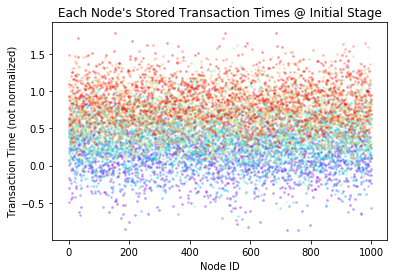

In [4]:
# Displays scatter plot of all current transactions' orders by each node

# Creates VALUES, a 2-D list with dimensions num_transactions * num_nodes
# VALUES: a list of each transactions' list of all recorded values
values = []
for name, row in ledger.iterrows():
    values += [row]

# Plots scatter
for txn, color in zip(values, colors):
    plt.scatter(x = ledger.columns, y = txn, alpha = 0.3, c = color, s=3)
plt.xlabel("Node ID")
plt.ylabel("Transaction Time (not normalized)")
plt.title("Each Node's Stored Transaction Times @ Initial Stage")


# Calculates epsilon for each transaction
ranges_init = [np.ptp(row) for name, row in ledger.iterrows()]

In [0]:
#Round 1

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

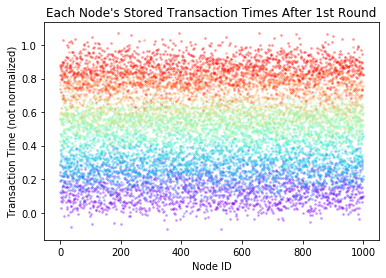

In [5]:
# Round 1 of EDA
to_update = [] # 2-D array that will store the new values for each node
for node in ledger.columns: # Iterates through all nodes; in theory this would be done distributedly in parallel
    # Randomly generates a list of s% of nodes to sample
    sampled_nodes = np.random.choice(ledger.columns, int(s * len(ledger.columns)))
    
    # RESULTS: 2D-list that stores all results collected from the sampled nodes
    results = [[] for i in range(len(order))]  
    for sample in sampled_nodes:
        for (index, val) in zip(order, results):
            val += [ledger.loc[index, sample]]
    
    # Aggregates values from RESULTS into a 1-D list using the AGGREGATOR function
    new_values = [aggregator(l) for l in results]
    
    # Stores the aggregated values to TO_UPDATE, which will update LEDGER at the end of the round
    to_update += [new_values]

# Updates LEDGER from TO_UPDATE, so that all nodes now store their new aggregated values
for node, new_val in zip(ledger.columns, to_update):
    ledger[node] = new_val

    
# Plots scatter; see above scatter plot code for comments
values = []
for name, row in ledger.iterrows():
    values += [row]
for txn, color in zip(values, colors):
    plt.scatter(x = ledger.columns, y = txn, alpha = 0.3, c = color, s=3)
plt.xlabel("Node ID")
plt.ylabel("Transaction Time (not normalized)")
plt.title("Each Node's Stored Transaction Times After 1st Round")


# Calculates epsilon for each transaction
ranges_round1 = [np.ptp(row) for name, row in ledger.iterrows()]

In [0]:
#Round 2

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

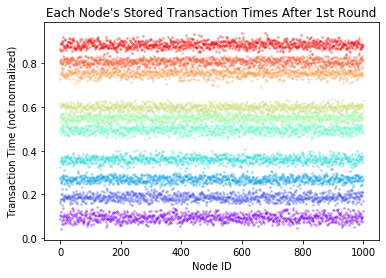

In [6]:
# Round 2 of EDA
to_update = [] # 2-D array that will store the new values for each node
for node in ledger.columns: # Iterates through all nodes; in theory this would be done distributedly in parallel
    # Randomly generates a list of s% of nodes to sample
    sampled_nodes = np.random.choice(ledger.columns, int(s * len(ledger.columns)))
    
    # RESULTS: 2D-list that stores all results collected from the sampled nodes
    results = [[] for i in range(len(order))]  
    for sample in sampled_nodes:
        for (index, val) in zip(order, results):
            val += [ledger.loc[index, sample]]
    
    # Aggregates values from RESULTS into a 1-D list using the AGGREGATOR function
    new_values = [aggregator(l) for l in results]
    
    # Stores the aggregated values to TO_UPDATE, which will update LEDGER at the end of the round
    to_update += [new_values]

# Updates LEDGER from TO_UPDATE, so that all nodes now store their new aggregated values
for node, new_val in zip(ledger.columns, to_update):
    ledger[node] = new_val

    
# Plots scatter; see above scatter plot code for comments
values = []
for name, row in ledger.iterrows():
    values += [row]
for txn, color in zip(values, colors):
    plt.scatter(x = ledger.columns, y = txn, alpha = 0.3, c = color, s=3)
plt.xlabel("Node ID")
plt.ylabel("Transaction Time (not normalized)")
plt.title("Each Node's Stored Transaction Times After 1st Round")


# Calculates epsilon for each transaction
ranges_round1 = [np.ptp(row) for name, row in ledger.iterrows()]

In [0]:
#Round 3

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

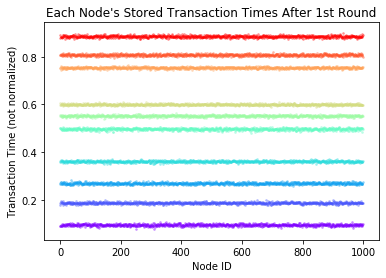

In [7]:
# Round 3 of EDA
to_update = [] # 2-D array that will store the new values for each node
for node in ledger.columns: # Iterates through all nodes; in theory this would be done distributedly in parallel
    # Randomly generates a list of s% of nodes to sample
    sampled_nodes = np.random.choice(ledger.columns, int(s * len(ledger.columns)))
    
    # RESULTS: 2D-list that stores all results collected from the sampled nodes
    results = [[] for i in range(len(order))]  
    for sample in sampled_nodes:
        for (index, val) in zip(order, results):
            val += [ledger.loc[index, sample]]
    
    # Aggregates values from RESULTS into a 1-D list using the AGGREGATOR function
    new_values = [aggregator(l) for l in results]
    
    # Stores the aggregated values to TO_UPDATE, which will update LEDGER at the end of the round
    to_update += [new_values]

# Updates LEDGER from TO_UPDATE, so that all nodes now store their new aggregated values
for node, new_val in zip(ledger.columns, to_update):
    ledger[node] = new_val

    
# Plots scatter; see above scatter plot code for comments
values = []
for name, row in ledger.iterrows():
    values += [row]
for txn, color in zip(values, colors):
    plt.scatter(x = ledger.columns, y = txn, alpha = 0.3, c = color, s=3)
plt.xlabel("Node ID")
plt.ylabel("Transaction Time (not normalized)")
plt.title("Each Node's Stored Transaction Times After 1st Round")


# Calculates epsilon for each transaction
ranges_round1 = [np.ptp(row) for name, row in ledger.iterrows()]

In [0]:
#Round 4

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

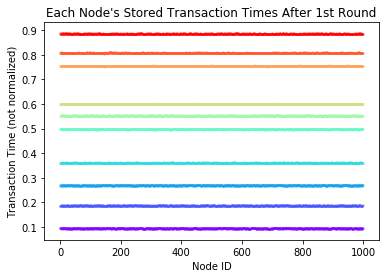

In [8]:
# Round 4 of EDA
to_update = [] # 2-D array that will store the new values for each node
for node in ledger.columns: # Iterates through all nodes; in theory this would be done distributedly in parallel
    # Randomly generates a list of s% of nodes to sample
    sampled_nodes = np.random.choice(ledger.columns, int(s * len(ledger.columns)))
    
    # RESULTS: 2D-list that stores all results collected from the sampled nodes
    results = [[] for i in range(len(order))]  
    for sample in sampled_nodes:
        for (index, val) in zip(order, results):
            val += [ledger.loc[index, sample]]
    
    # Aggregates values from RESULTS into a 1-D list using the AGGREGATOR function
    new_values = [aggregator(l) for l in results]
    
    # Stores the aggregated values to TO_UPDATE, which will update LEDGER at the end of the round
    to_update += [new_values]

# Updates LEDGER from TO_UPDATE, so that all nodes now store their new aggregated values
for node, new_val in zip(ledger.columns, to_update):
    ledger[node] = new_val

    
# Plots scatter; see above scatter plot code for comments
values = []
for name, row in ledger.iterrows():
    values += [row]
for txn, color in zip(values, colors):
    plt.scatter(x = ledger.columns, y = txn, alpha = 0.3, c = color, s=3)
plt.xlabel("Node ID")
plt.ylabel("Transaction Time (not normalized)")
plt.title("Each Node's Stored Transaction Times After 1st Round")


# Calculates epsilon for each transaction
ranges_round1 = [np.ptp(row) for name, row in ledger.iterrows()]

In [10]:
# Calculates worst epsilon out of all the transactions and nodes
worst_differences = []
for index, (name, row) in zip(range(ledger.shape[0]), ledger.iterrows()): # Iterates through transactions
    actual = order[index]
    worst_differences += [max(abs(row - actual))] # Epsilon value for the node with the highest epsilon
max(worst_differences)

0.02490926496652726